<a href="https://colab.research.google.com/github/rahool010/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Book Recommendation System </u></b>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## <b> Content </b>

The Book-Crossing dataset comprises 3 files.

##**Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

##**Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

##**Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, *expressed* on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
from sklearn.neighbors import NearestNeighbors 
from scipy.sparse import csr_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
users_df = pd.read_csv("/content/drive/MyDrive/data_book_recommendation/Users.csv")
books_df = pd.read_csv("/content/drive/MyDrive/data_book_recommendation/Books.csv")
ratings_df = pd.read_csv("/content/drive/MyDrive/data_book_recommendation/Ratings.csv")

## **Data Preprocessing**

In [4]:
# displaying top 5 rows of the data
books_df.head() 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
# checking datatypes
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
# check shape of dataset
books_df.shape

(271360, 8)

In [8]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

It can be seen that there are some wrong entries. Publisher's name ('DK Publishing Inc' and 'Gallimard') are wrongly entered. 

In [9]:
# finding the book record location for which Year-Of-Publication is 'DK Publishing Inc'
books_df.loc[books_df['Year-Of-Publication'] == 'DK Publishing Inc', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [10]:
# From above, it is seen that book author is incorrectly loaded with book title, hence making required corrections 
# corrections in the book record for ISBN 0789466953
books_df.loc[books_df.ISBN == '0789466953', 'Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953', 'Book-Author'] = "James Buckley"
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

# corrections in the book record for ISBN 078946697X
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [11]:
# rechecking 
books_df.loc[(books_df.ISBN == '0789466953') | (books_df.ISBN == '078946697X'), :]  

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [12]:
# finding the book record location for which the year of publication is 'Gallimard'
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [13]:
#making required corrections as above, keeping other fields intact
books_df.loc[books_df.ISBN == '2070426769','Year-Of-Publication'] = 2003
books_df.loc[books_df.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books_df.loc[books_df.ISBN == '2070426769','Publisher'] = "Gallimard"
books_df.loc[books_df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

# rechecking
books_df.loc[books_df.ISBN == '2070426769', :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [14]:
# correcting the datatypes of year of publication
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')  # invalid parsing will be set as NaN
print(sorted(books_df['Year-Of-Publication'].unique()))   # identifying different years of publication existed in books record

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


The value 0 for the Year-Of-Publication is invalid and as this dataset was published in 2004. We have assumed that the years after 2006 will be invalid. So, setting invalid years as NaN.

In [15]:
books_df.loc[(books_df['Year-Of-Publication'] > 2006) | (books_df['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = np.nan

# replacing NaN's with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].median()), inplace=True)

In [16]:
 # converting the datatype of year of publication as int32 
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(np.int32)

In [17]:
#dropping the columns containing image URLs which will not be required for analysis
books_df.drop(['Image-URL-L', 'Image-URL-M'],axis=1,inplace=True)

In [18]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
dtype: int64

In [19]:
# finding the locations of records in which publisher with NaN or Null
books_df.loc[books_df['Publisher'].isnull(), :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...


In [20]:
# the null publishers are replaced with 'others' in the books records
books_df.Publisher.fillna('other', inplace=True)

In [21]:
# exploring the book author column
books_df.loc[books_df['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...


In [22]:
# filling NaN of Book-Author with 'other'
books_df['Book-Author'].fillna('other', inplace=True)

In [23]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
dtype: int64

**Book-Title**

In [24]:
books_df['Book-Title'].describe()

count             271360
unique            242135
top       Selected Poems
freq                  27
Name: Book-Title, dtype: object

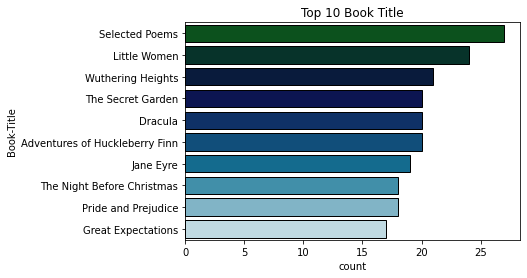

In [26]:
sns.countplot(y='Book-Title', data=books_df, order=pd.value_counts(books_df['Book-Title']).iloc[:10].index,
              palette='ocean', edgecolor='k')
plt.title('Top 10 Book Title')
plt.show()

**Book Author**

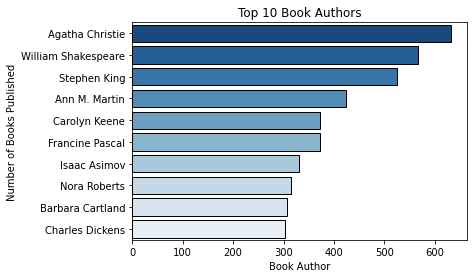

In [27]:
# counting boooks written by each author
cnt = books_df.groupby(['Book-Author'])['Book-Title'].count().sort_values(ascending=False).head(10)
cnt = cnt.reset_index()

# plotting the top 10 authors with most number of books
sns.barplot(data=cnt, y='Book-Author', x='Book-Title', palette='Blues_r', edgecolor='k')
plt.xlabel('Book Author')
plt.ylabel('Number of Books Published')
plt.title('Top 10 Book Authors')
plt.show()

From the above graph, we see 'Agatha Christie' has the most number of books.

**Publisher**

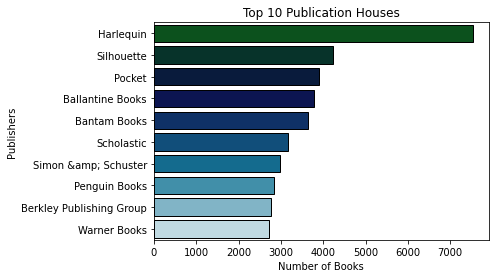

In [28]:
# counting books published by each publisher
cnt = books_df.groupby(['Publisher'])['Book-Title'].count().sort_values(ascending=False).head(10)
cnt = cnt.reset_index()

# plotting the top 10 authors with most number of books
sns.barplot(data=cnt, x='Book-Title', y='Publisher', palette='ocean', edgecolor='k')
plt.xlabel('Number of Books')
plt.ylabel('Publishers')
plt.title('Top 10 Publication Houses')
plt.show()

'Harlequin' has published the most number of books.

### **Users dataset**

In [29]:
# displaying top 5 rows of users dataset
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [30]:
# displaying datatypes
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [31]:
# check the count and percentage of null values
null_df=pd.DataFrame({'null_values':users_df.isnull().sum(),
                  'null_percent':users_df.isnull().sum()/users_df.shape[0]*100})
null_df=null_df[null_df['null_values']>0]
null_df

,null_values,null_percent
Age,110762,39.719857


Only Age column has missing values around 39%.

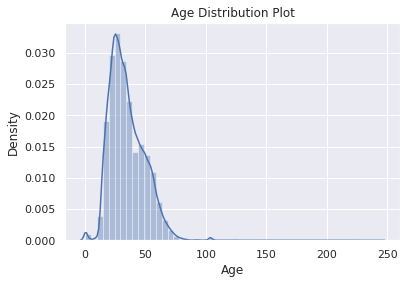

In [32]:
# let's check the Age distribution
sns.set_theme(style='darkgrid')
sns.distplot(users_df.Age)
plt.title('Age Distribution Plot')
plt.show()

Age values below 5 and above 90 does not make sense for our book rating case. Hence, will make these values as NaN's and fill those NaN values with the mean values.

In [33]:
# take a look at locations
users_df['Location'].values

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'brampton, ontario, canada', 'knoxville, tennessee, usa',
       'dublin, n/a, ireland'], dtype=object)

In [34]:
# number of unique locations
users_df['Location'].nunique()

57339

lot of unique values, so let's create Country column

In [35]:
for i in users_df:
    users_df['Country'] = users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [36]:
users_df.Country.nunique()

529

In [37]:
# drop location colum
users_df.drop(['Location'], axis=1, inplace=True)

In [38]:
# change country datatype as string
users_df['Country'] = users_df['Country'].astype('str')

In [39]:
# check the values in the country column
a=list(users_df.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [40]:
# making the ages above 90 years and below 5 years age as NaN 
users_df.loc[(users_df.Age > 90) | (users_df.Age < 5), 'Age'] = np.nan

#### Age has the positive skewness, so we can use median values to replace NaN values
users_df['Age'] = users_df['Age'].fillna(users_df.groupby('Country')['Age'].transform('median'))

In [41]:
# recheck
users_df.isna().sum()

User-ID      0
Age        293
Country      0
dtype: int64

Still there are 293 NaN values, let's fill these values with mean.

In [42]:
users_df['Age'].fillna(users_df.Age.mean(),inplace=True)

In [43]:
# recheck
users_df.isnull().sum()

User-ID    0
Age        0
Country    0
dtype: int64

**Country**

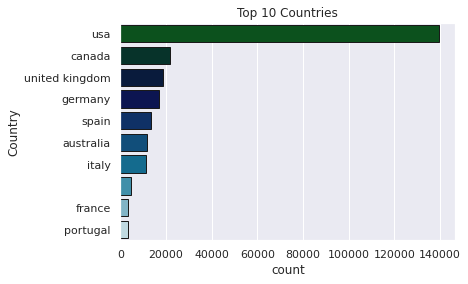

In [44]:
# plot the top 10 countries who has maximum number of users
sns.countplot(y='Country', data=users_df, order=pd.value_counts(users_df['Country']).iloc[:10].index,
              palette='ocean', edgecolor='k')
plt.title('Top 10 Countries')
plt.show()

From the above graph, we see that the USA has highest number of users.

### **Ratings**

In [45]:
# displaying the top 5 rows of the ratings data
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [46]:
# checking datatypes
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [47]:
# checking for null values
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Here, we don't have any missing values.

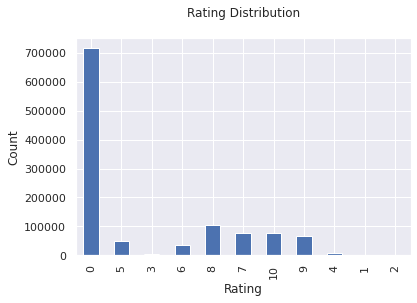

In [48]:
# let's check the ratings distribution
plt.rc("font", size=20)
ratings_df['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [49]:
# ratings dataset should have books only which exist in our books dataset
ratings_new = ratings_df[ratings_df.ISBN.isin(books_df.ISBN)]
print("Shape of dataset before dropping", ratings_df.shape)
print("shape of dataset after dropping", ratings_new.shape)

Shape of dataset before dropping (1149780, 3)
shape of dataset after dropping (1031136, 3)


In [50]:
# ratings dataset should have ratings from users which exist in users dataset
ratings_new = ratings_new[ratings_new['User-ID'].isin(users_df['User-ID'])]
print("Shape of dataset before dropping",ratings_df.shape)
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1149780, 3)
shape of dataset after dropping (1031136, 3)


In [51]:
# this is the set of books which are not having zero rating from the ratings_new dataset
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]

# this is the set of books which are having zero rating from ratings_new dataset
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [52]:
print('ratings_explicit dataset shape',ratings_explicit.shape)
print('ratings_implicit dataset',ratings_implicit.shape)

ratings_explicit dataset shape (383842, 3)
ratings_implicit dataset (647294, 3)


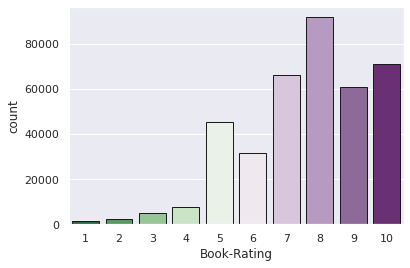

In [53]:
sns.countplot(data=ratings_explicit, x='Book-Rating',
              palette='PRGn_r', edgecolor='k')
plt.show()

It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times.

In [54]:
# taking each book by grouping with help of their ISBN and sum all the ratings given by different users
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['Book-Rating'].sum())

# arrange it in descending order so that those top most books can be recommended to any of the users
top10 = ratings_count.sort_values('Book-Rating', ascending=False).head(10)
print("Following Books are recommended")
top10_rated_books_summary = pd.merge(top10, books_df, on='ISBN')
top10_rated_books_summary

Following Books are recommended


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,0316666343,5787,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...
1,0385504209,4108,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...
2,0312195516,3134,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...
3,059035342X,2798,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
4,0142001740,2595,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books,http://images.amazon.com/images/P/0142001740.0...
5,0971880107,2551,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...
6,0060928336,2524,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...
7,0446672211,2402,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...
8,0452282152,2219,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books,http://images.amazon.com/images/P/0452282152.0...
9,0671027360,2179,Angels &amp; Demons,Dan Brown,2001,Pocket Star,http://images.amazon.com/images/P/0671027360.0...


These are top 10 recommendations based on popularity of sum of book rating values

In [55]:
# create column average rating
ratings_explicit['Average_Rating'] = ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')

# create column sum rating
ratings_explicit['Total_Users_Rated'] = ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [56]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Average_Rating,Total_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


In [57]:
# merging three datasets to get the final dataset
final_df = users_df.copy()
final_df = pd.merge(final_df, ratings_explicit, on='User-ID')
final_df = pd.merge(final_df, books_df, on='ISBN')

In [58]:
final_df.head()

,User-ID,Age,Country,ISBN,Book-Rating,Average_Rating,Total_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,8,33.0,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
1,11676,28.0,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,67544,30.0,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
3,116866,32.0,,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
4,123629,33.0,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [59]:
final_df.isnull().sum()

User-ID                0
Age                    0
Country                0
ISBN                   0
Book-Rating            0
Average_Rating         0
Total_Users_Rated      0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
dtype: int64

## **Weighted Hybrid Technique for Recommender System**

In [60]:
C = final_df['Average_Rating'].mean()
m = final_df['Total_Users_Rated'].quantile(0.90)
top_books = final_df.loc[final_df['Total_Users_Rated'] >= m]
print('C=',C , 'm=',m)
top_books.shape

C= 7.626700569504765 m= 64.0


(38570, 12)

Here, I have used 90th percentile as cutoff. It means, for a book to feature in the charts, it must have votes more than atleast 90% of the books in the list. There are 38570 books which qualify to be in this list.

Let's calculate metric for each qualified book. To do this, we define a function weighted_rating() and create a new feature 'Score', of which we will calculate the value by applying this function to our DataFrame of qualified books.

In [61]:
def weighted_rating(x, m=m, C=C):
  v = x['Total_Users_Rated']
  R = x['Average_Rating']
  return (v/(v+m)*R) + (m/(m+v)*C)

top_books['Score'] = top_books.apply(weighted_rating, axis=1)

# sorting books based on score calculated above
top_books = top_books.sort_values('Score', ascending=False)

In [64]:
# keeping only one entry of each book
top_books = top_books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm = sns.light_palette('blue', as_cmap=True)
# sorting books based on score calculated above
top_books = top_books.sort_values('Score',ascending=False)

# printing top 10 books
top_books[['Book-Title', 'Book-Author','Total_Users_Rated', 'Average_Rating', 'Score']].reset_index(drop=True).head(10)

,Book-Title,Book-Author,Total_Users_Rated,Average_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,206,9.033981,8.700403
3,To Kill a Mockingbird,Harper Lee,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,126,8.920635,8.484783


* Harry Potter is the most popular book series. Other books like To Kill A Mockingbird and The Da Vinci Code are among top books.
* Books by J. K. Rowling are the most rated.